In [1]:
using DataTables
using Plots
using StatsBase
using Distributions
using StatsFuns
using KernelDensity
using Statistics
using StatsPlots
using CSV
using DataFrames
using LaTeXStrings
using LsqFit
using DelimitedFiles

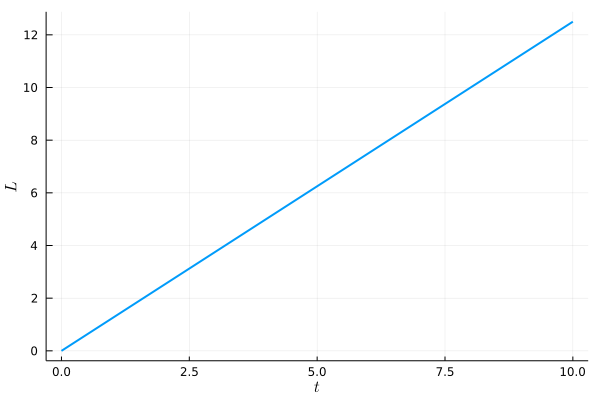

In [3]:
v_sr = 10

n = 2
g = n / v_sr
p = 1

L0 = 0
dL = (v_sr * g - p) / (1 - g)
L(t) = L0 + dL * t

ts = 0:0.01:10
plot(ts, L.(ts), xlabel=L"t", ylabel=L"L", legend=false, lw=2) |> display

plt = plot!(dpi=500)
savefig(plt, "images/pres1_1")

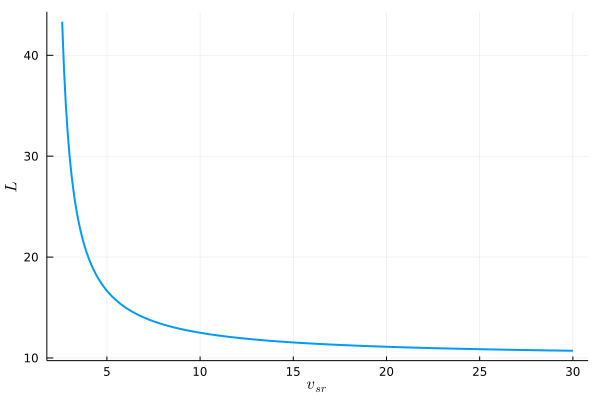

In [4]:
n = 2
g = n / v_sr
p = 1

L0 = 0
L(t, v_sr) = L0 + t * (n - p) / (1 - n/v_sr)

vs = n+0.6:0.1:30
Ls = L.(10, vs)
plot(vs, Ls, xlabel=L"v_{sr}", ylabel=L"L", legend=false, lw=2) |> display

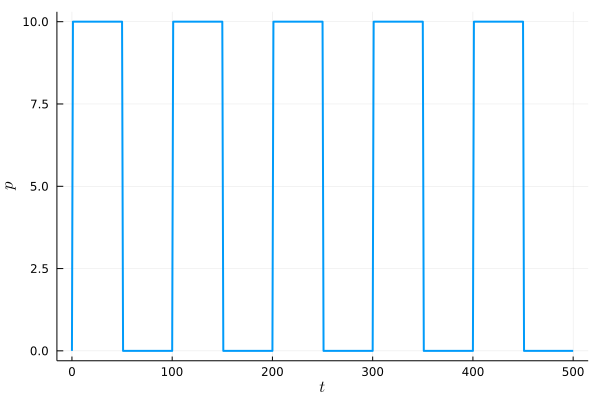

In [5]:
function p1(t, T_Z)
    if 0 < t % 100 <= T_Z
        return v_sr
    else
        return 0.0
    end
end

ts = 0:1:500
plot(ts, p1.(ts, 50), lw=2, legend=false, xlabel=L"t", ylabel=L"p") |> display

plt = plot!(dpi=500)
savefig(plt, "images/pres1_2")

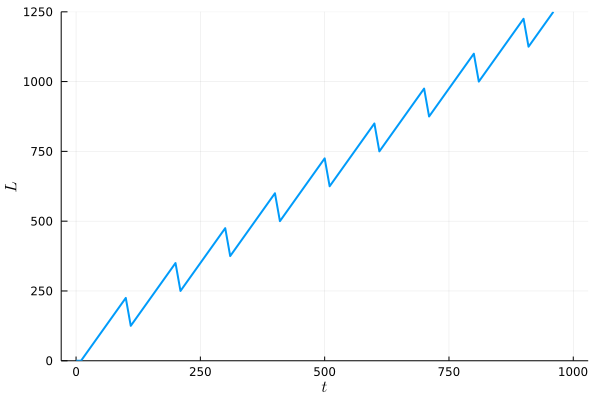

In [6]:
v_sr = 10
n = 2
g = n / v_sr

L0 = 0

dt = 0.1 # Krok czasowy
T = 1000

T_Z = 10

# Wartości L'(t)
dL = dt .* (v_sr .* g .- p1.(dt:dt:T, T_Z)) ./ (1 - g)

# Metodą Eulera wyliczamy wartości L(t)
L1 = [dL[1]]
for t in 2dt:dt:T
    index = Int(round(t/dt))
    l = L1[index-1] + dL[index]
    if l <= 0
        append!(L1, 0)
    else
        append!(L1, l)
    end
end

plot(dt:dt:T, L1, xlabel=L"t", ylabel=L"L", label=L"L(t)", ylims=(0, 1250), lw=2, legend=false) |> display

plt = plot!(dpi=500)
savefig(plt, "images/pres1_3")

┌ Info: Saved animation to 
│   fn = c:\Users\szymo\OneDrive\Dokumenty\GitHub\Traffic-congestion-modelling\images\pres1_gif.gif
└ @ Plots C:\Users\szymo\.julia\packages\Plots\FKcum\src\animation.jl:104


Plots.AnimatedGif("c:\\Users\\szymo\\OneDrive\\Dokumenty\\GitHub\\Traffic-congestion-modelling\\images\\pres1_gif.gif")
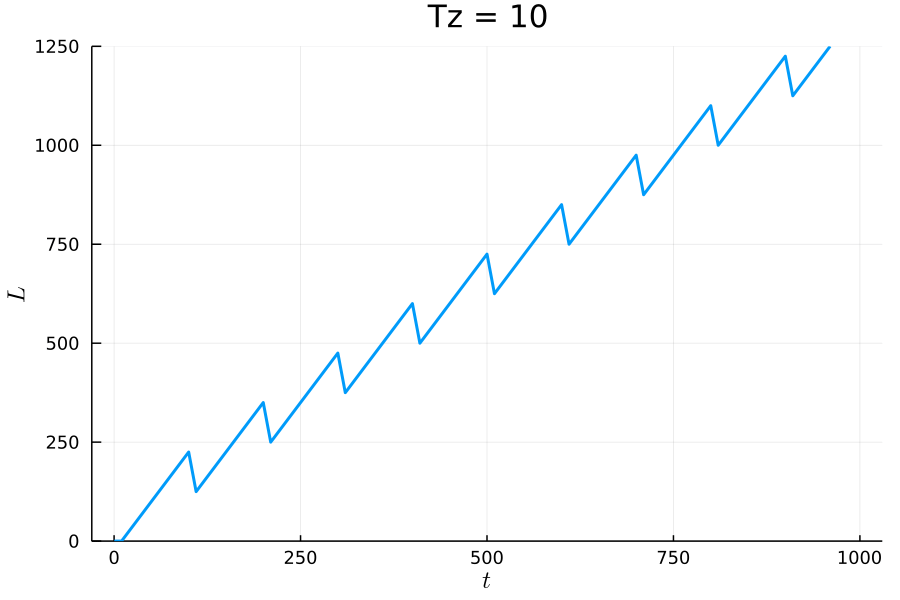

In [7]:
v_sr = 10
n = 2
g = n / v_sr

L0 = 0

dt = 0.1 # Krok czasowy
T = 1000

anim = @animate for T_Z in 10:1:60

    # Wartości L'(t)
    dL = dt .* (v_sr .* g .- p1.(dt:dt:T, T_Z)) ./ (1 - g)

    # Metodą Eulera wyliczamy wartości L(t)
    L1 = [dL[1]]
    for t in 2dt:dt:T
        index = Int(round(t/dt))
        l = L1[index-1] + dL[index]
        if l <= 0
            append!(L1, 0)
        else
            append!(L1, l)
        end
    end
    plot(dt:dt:T, L1, title="Tz = $T_Z", xlabel=L"t", ylabel=L"L", label=L"L(t)", ylims=(0, 1250), lw=2, dpi=150, legend=false)
end

gif(anim, "images/pres1_gif.gif", fps= 10)